In [1]:
import os
import soundfile as sf
import librosa
import numpy as np
import torch
import torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt

Configurations

In [2]:
SAMPLE_RATE = 16000
DURATION = 3
AUDIO_DIR_PATH = "./data/train" 
HOP_LENGTH = 512
LABELS = 3 # my data only consist of 3 different speaker, change to 200 here

Load audio and load it into raw waveforms segments

In [3]:
segments = []
for audio_file_name in os.listdir(AUDIO_DIR_PATH):    
    waveform, sr = librosa.load(os.path.join(AUDIO_DIR_PATH, audio_file_name), sr=SAMPLE_RATE)
    total_samples = DURATION * SAMPLE_RATE 
    for i in range(0, len(waveform) - total_samples + 1, total_samples):
        segments.append(waveform[i:i + total_samples]) # last incomplete segment will be excluded

In [4]:
len(segments)

7

Spectograms Visualization

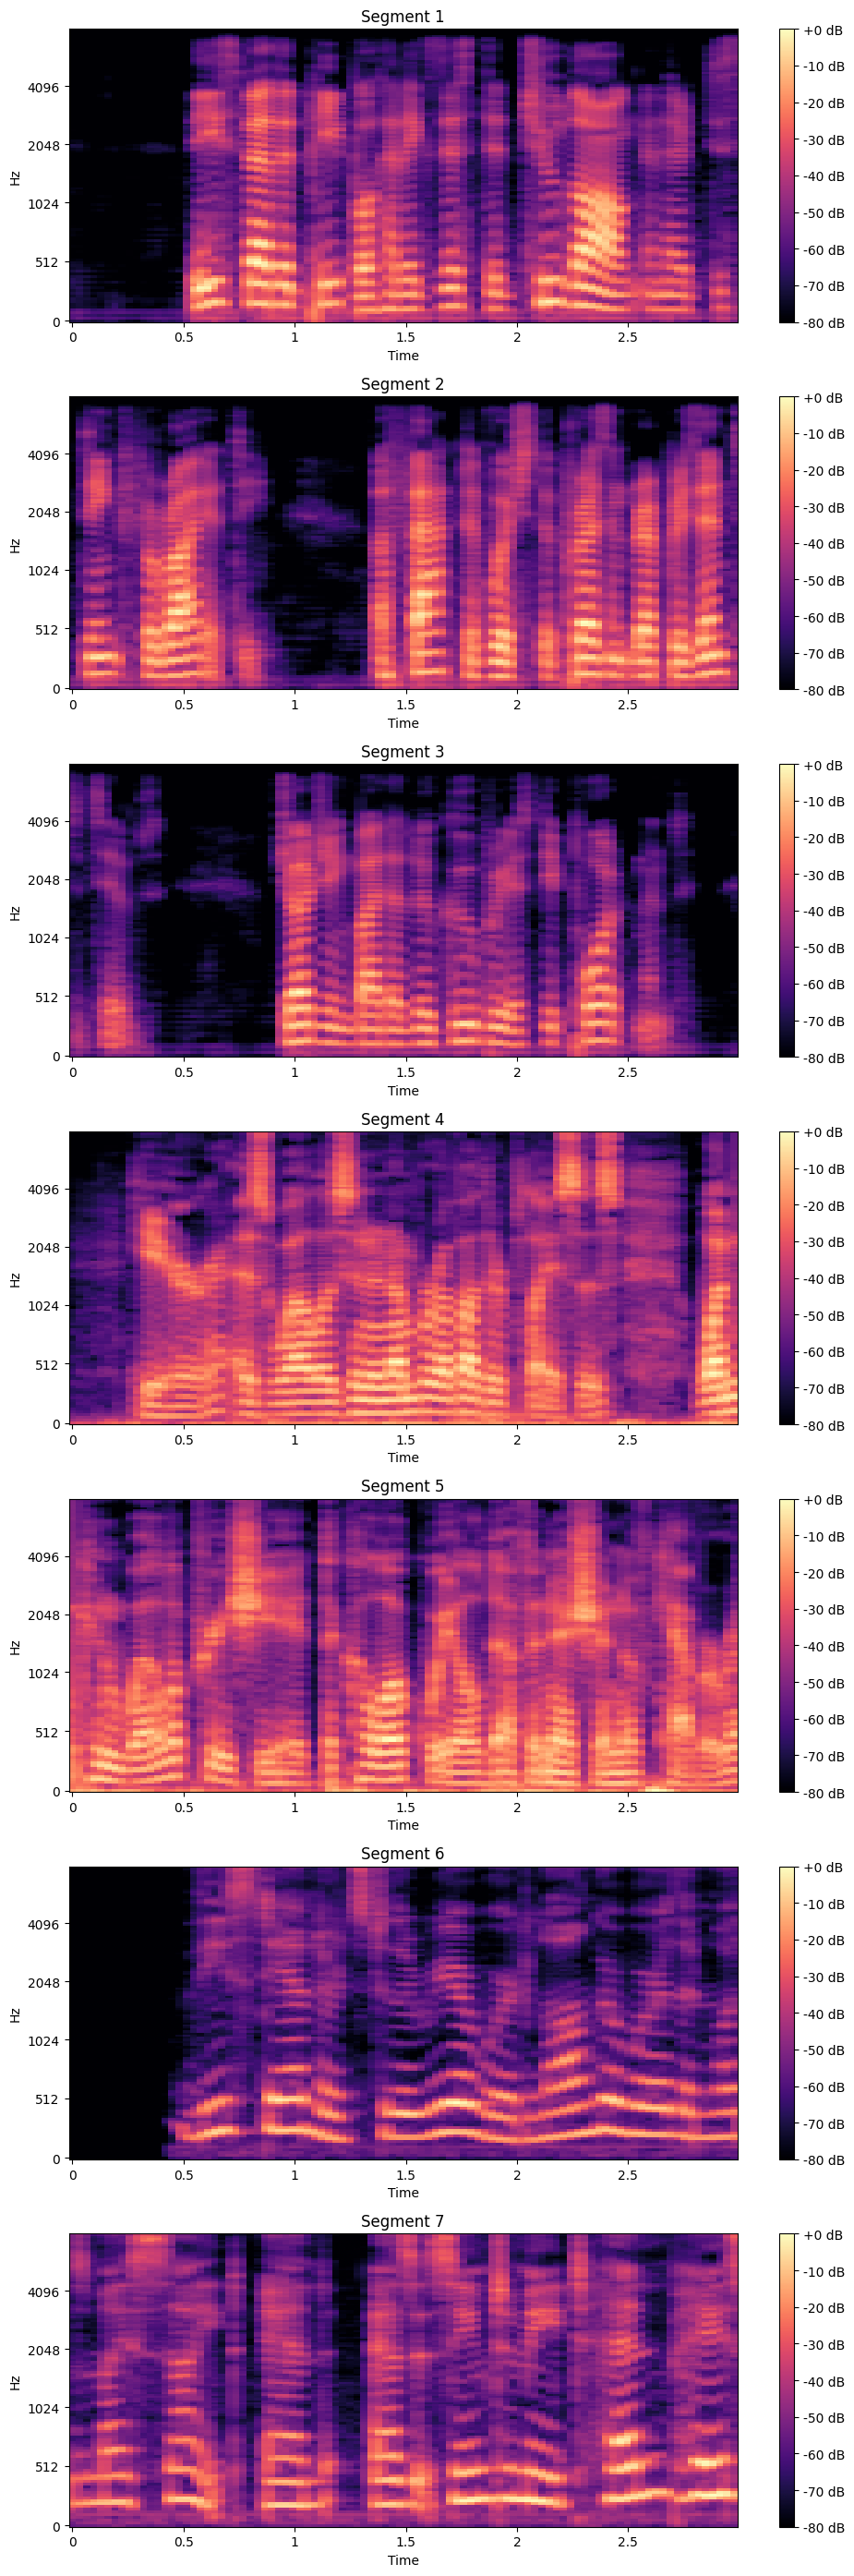

In [5]:
import librosa.display

# Plot all segments in one figure
fig, axes = plt.subplots(len(segments), 1, figsize=(10, 4 * len(segments)))

if len(segments) == 1:
    axes = [axes]  # handle case with only one subplot

for idx, segment in enumerate(segments):
    mel_spec = librosa.feature.melspectrogram(y=segment, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    ax = axes[idx]
    img = librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', ax=ax)
    ax.set_title(f'Segment {idx + 1}')
    fig.colorbar(img, ax=ax, format='%+2.0f dB')

plt.tight_layout()
plt.show()

Prosody Study

In [6]:
def get_prosodic_curves(segment, sr=SAMPLE_RATE, hop_length=HOP_LENGTH):
    pitch = librosa.yin(segment, fmin=50, fmax=300, sr=sr, hop_length=hop_length)
    energy = librosa.feature.rms(y=segment, hop_length=hop_length)[0]
    frames = range(len(pitch))
    times = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
    return times, pitch, energy

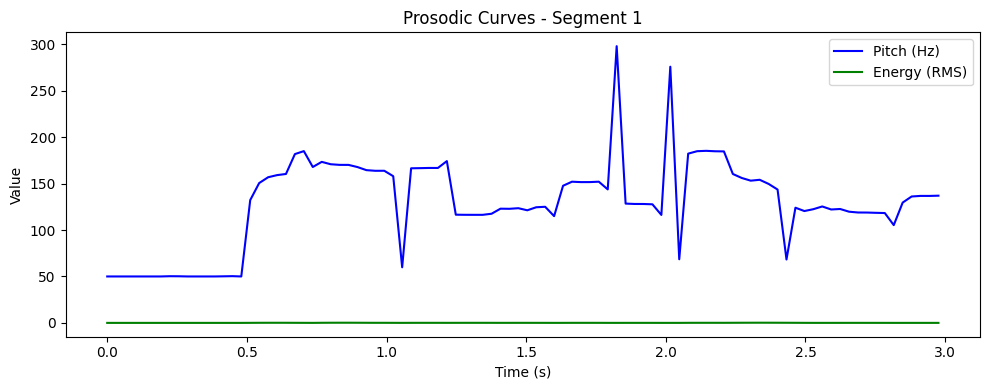

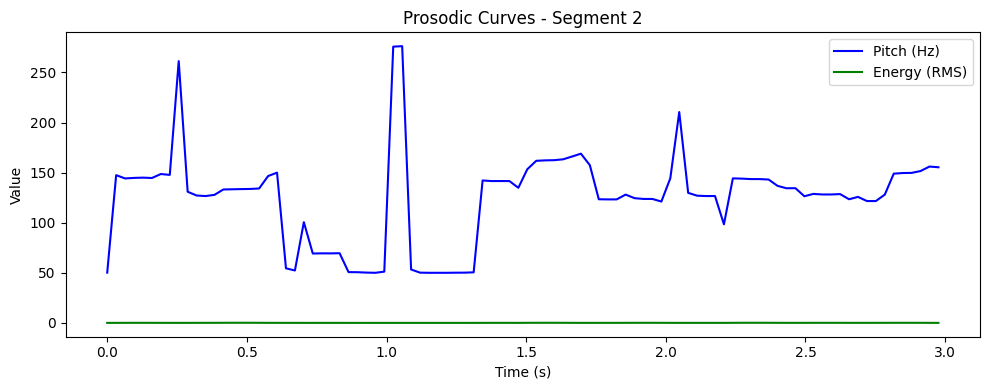

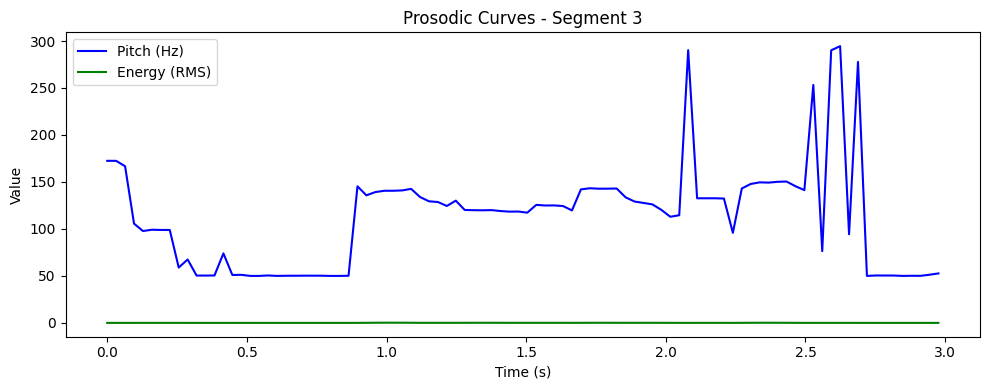

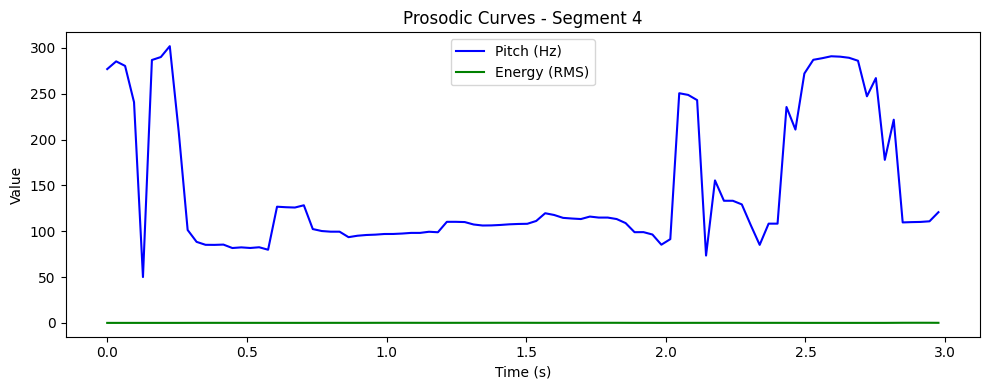

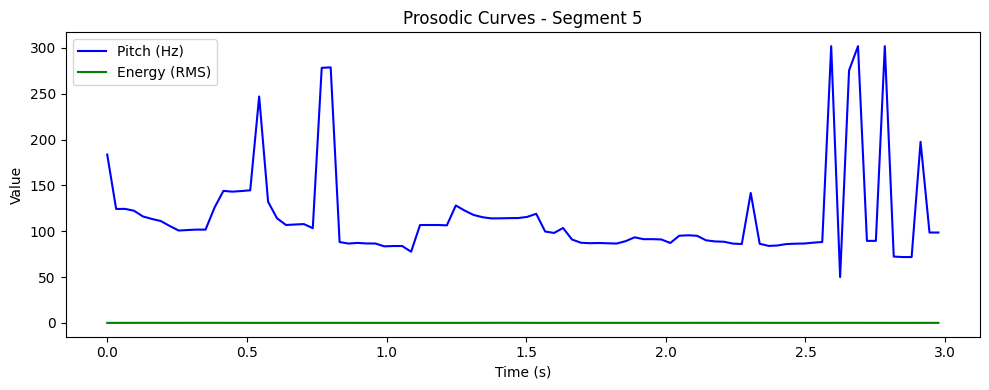

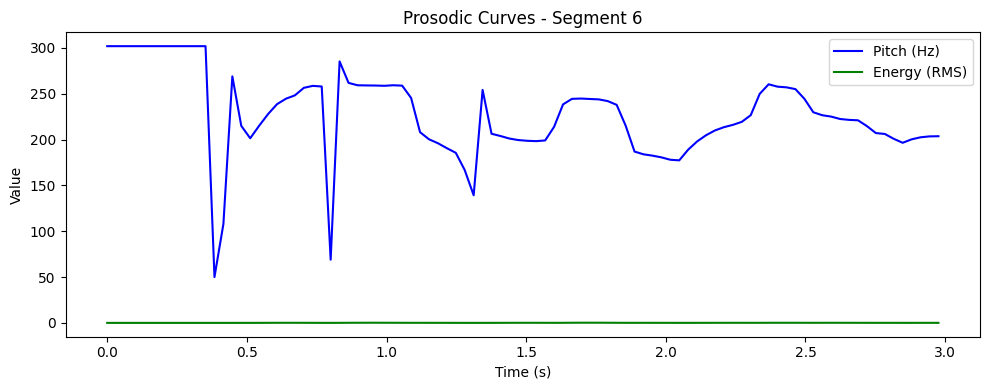

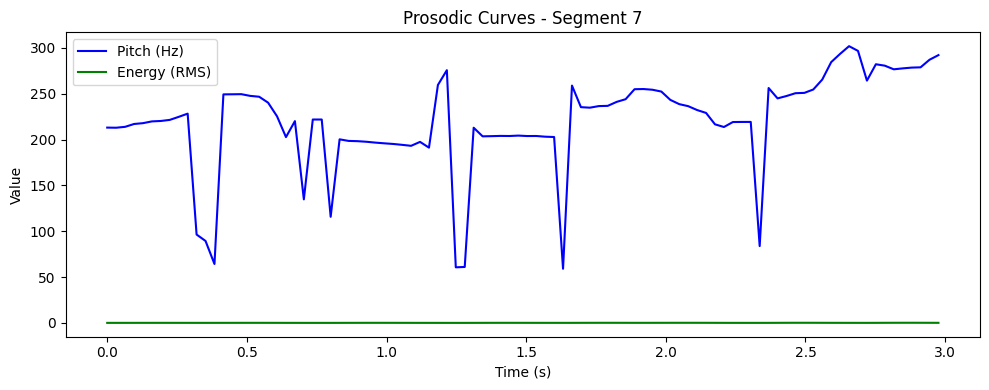

In [8]:
for idx, segment in enumerate(segments[:len(segments)]):  # visualize first 3 segments
    times, pitch, energy = get_prosodic_curves(segment)

    plt.figure(figsize=(10, 4))
    plt.plot(times, pitch, label='Pitch (Hz)', color='blue')
    plt.plot(times, energy, label='Energy (RMS)', color='green')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title(f'Prosodic Curves - Segment {idx + 1}')
    plt.legend()
    plt.tight_layout()
    plt.show()